In [1]:
import pandas as pd
import numpy as np


In [12]:
names1880=pd.read_csv('datasets/babynames/yob1880.txt',names=['name','sex','births'])


In [13]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [15]:
names.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [16]:
years=range(1880,2011)

In [18]:
pieces=[]
columns=['name','sex','births']
for year in years:
    path='datasets/babynames/yob%d.txt' % year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [20]:
names=pd.concat(pieces,ignore_index=True)


In [21]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [22]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


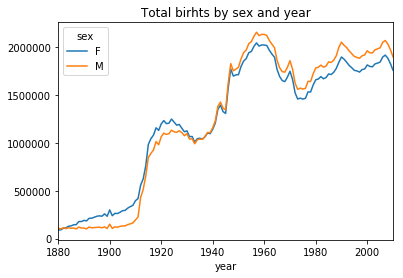

In [24]:
total_births.plot(title='Total birhts by sex and year');


In [25]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)


In [26]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [27]:
names.groupby(['year','sex']).prop.sum()


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    